<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/PDF_Resume_Parser_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install poppler-utils

In [ ]:
!pip install pdf2image
!pip install easyocr

In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
!wget https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf

--2020-11-25 01:57:52--  https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf
Resolving writing.colostate.edu (writing.colostate.edu)... 129.82.210.34
Connecting to writing.colostate.edu (writing.colostate.edu)|129.82.210.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98553 (96K) [application/pdf]
Saving to: ‘functionalSample.pdf’

functionalSample.pd 100%[===================>]  96.24K  --.-KB/s    in 0.07s   

2020-11-25 01:57:52 (1.26 MB/s) - ‘functionalSample.pdf’ saved [98553/98553]



In [ ]:
images = convert_from_path('functionalSample.pdf')

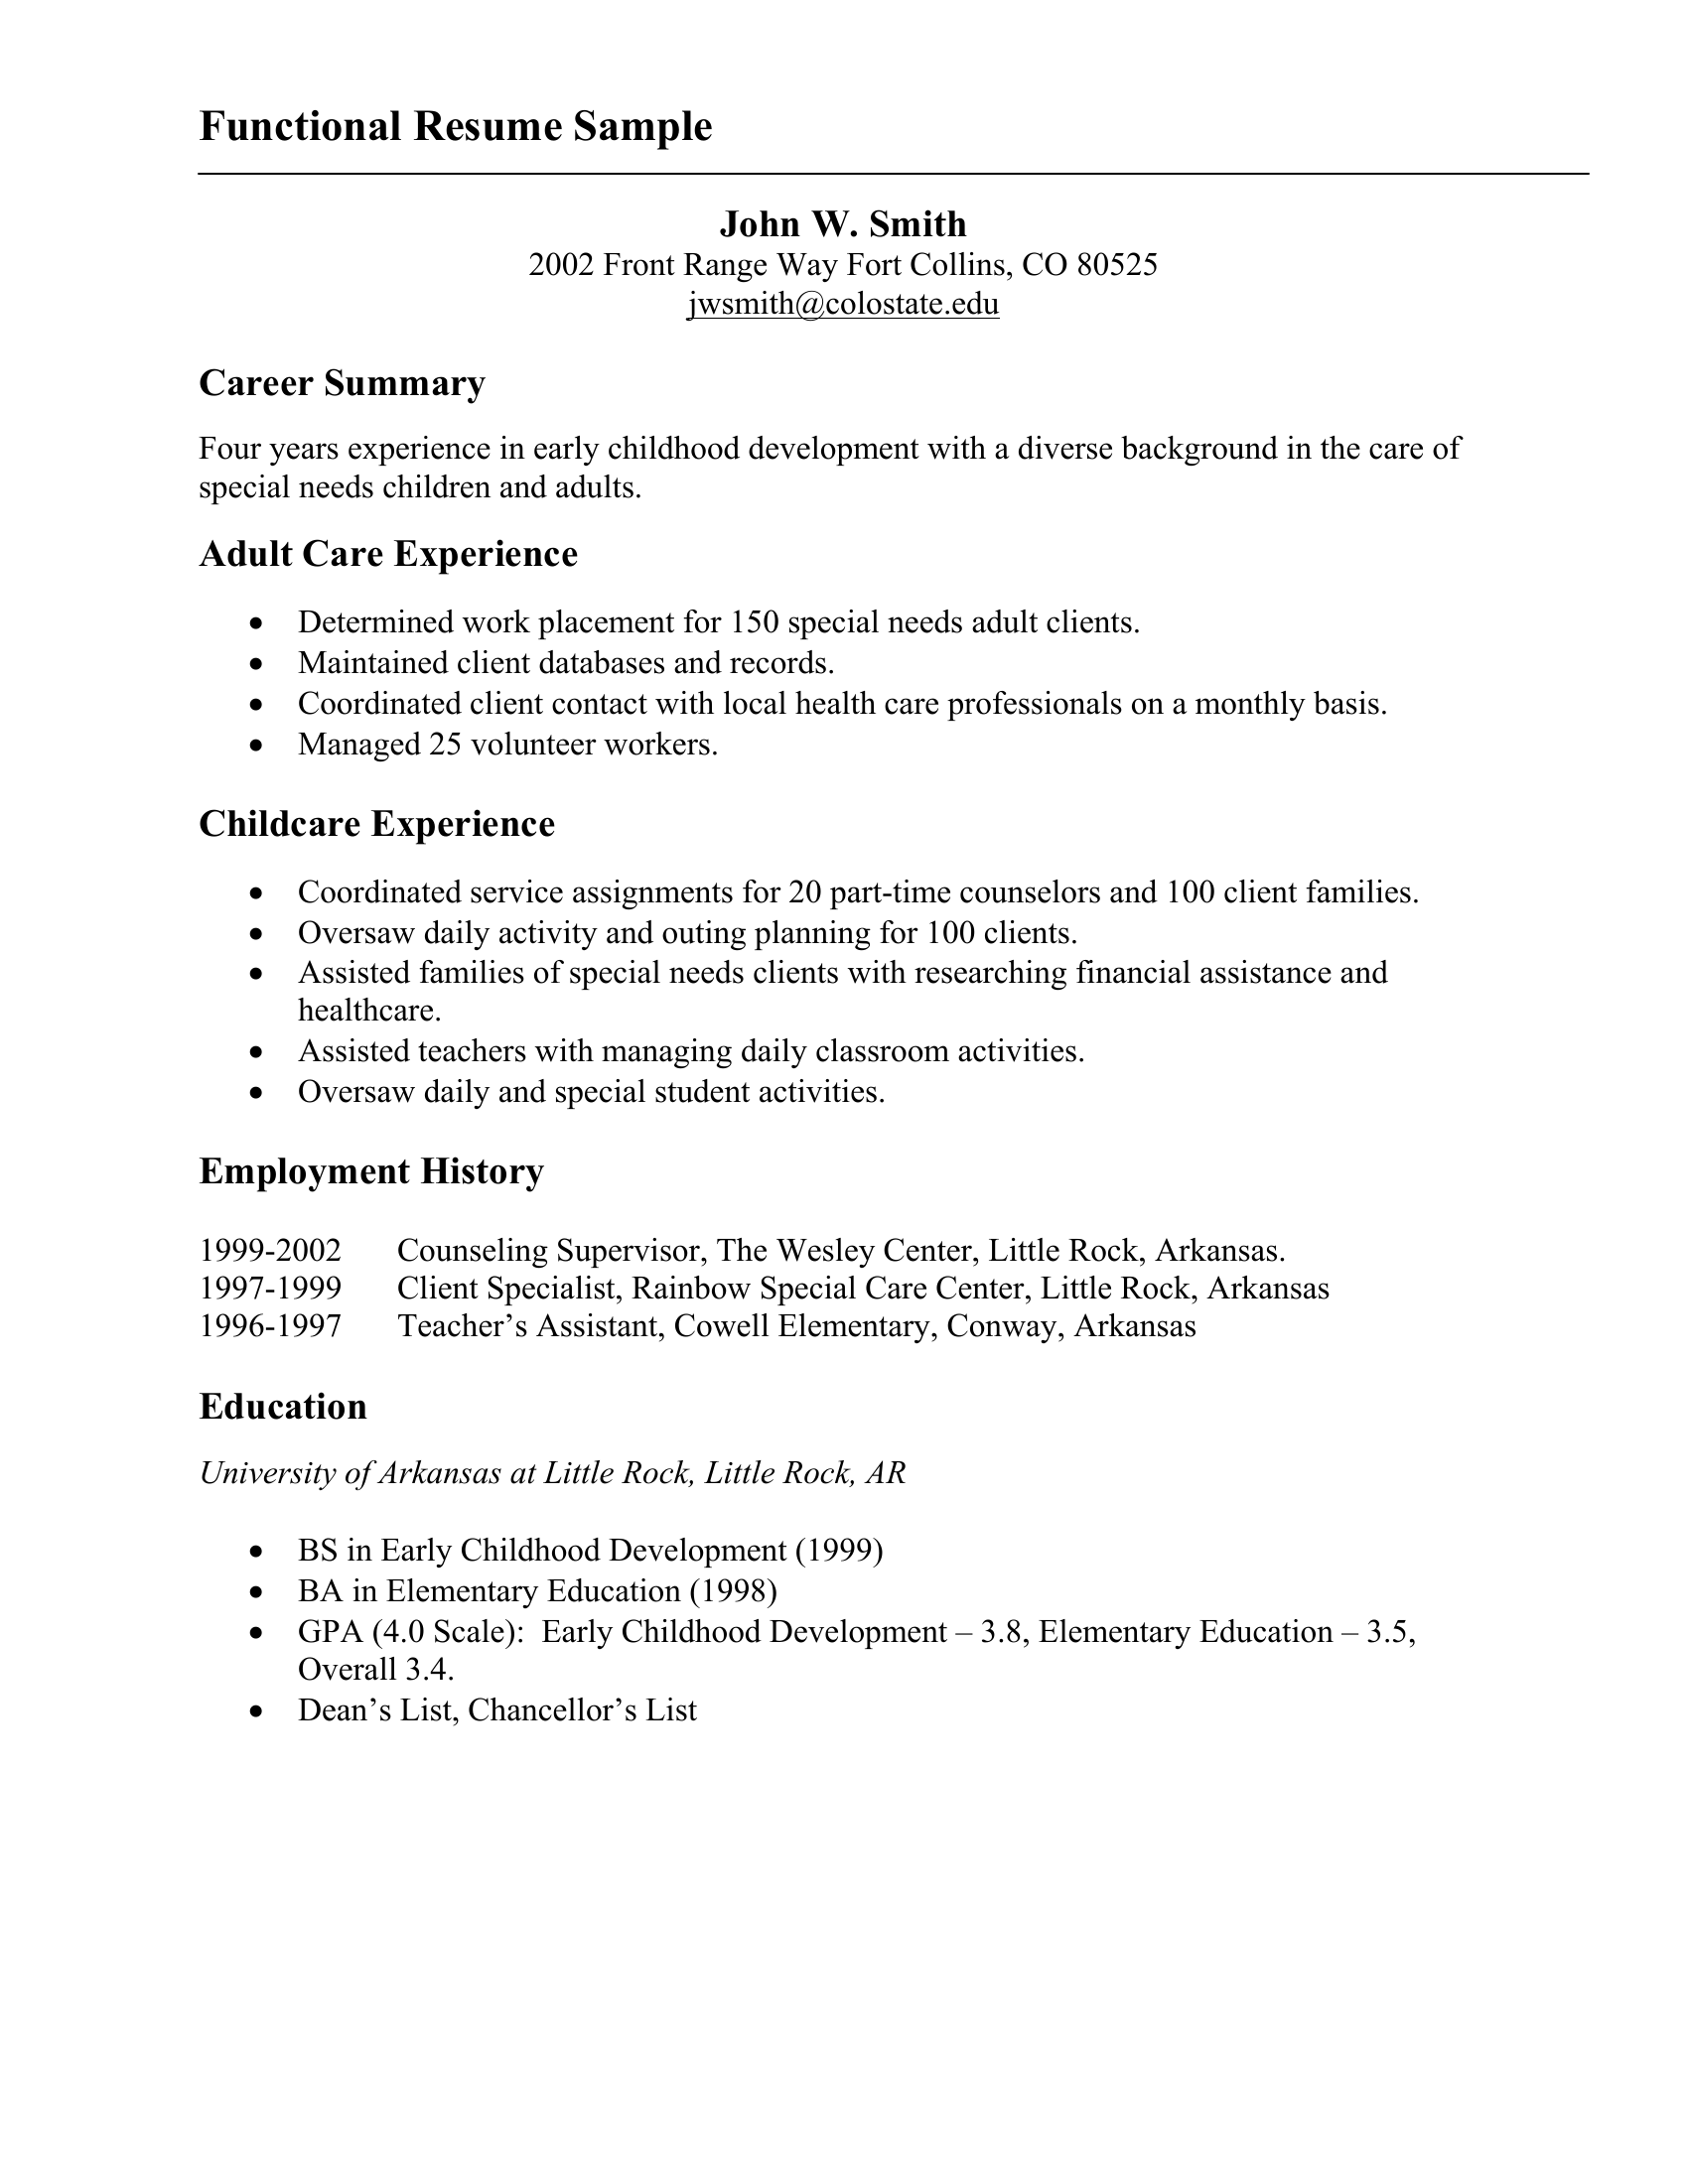

In [ ]:
from IPython.display import display, Image
display(images[0])

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[194, 102], [726, 102], [726, 159], [194, 159]],
  'Functional Resume Sample',
  0.7547321915626526),
 ([[721, 205], [979, 205], [979, 245], [721, 245]],
  'John W. Smith',
  0.24395312368869781),
 ([[529, 247], [1171, 247], [1171, 291], [529, 291]],
  '20O2 Front Range Way Fort Collins, C0 80525',
  0.026482634246349335),
 ([[688, 285], [1013, 285], [1013, 327], [688, 327]],
  'iwsmith@colostate edu',
  0.41685745120048523),
 ([[196, 362], [497, 362], [497, 414], [196, 414]],
  'Career Summary',
  0.8907639384269714),
 ([[196, 430], [1480, 430], [1480, 478], [196, 478]],
  'Four years experience in early childhood development with a diverse background in the care of',
  0.021435467526316643),
 ([[192, 467], [649, 467], [649, 519], [192, 519]],
  'special needs children and adults.',
  0.44582435488700867),
 ([[198, 536], [590, 536], [590, 586], [198, 586]],
  'Adult Care Experience',
  0.38387155532836914),
 ([[296, 604], [1152, 604], [1152, 654], [296, 654]],
  'Determined work pl

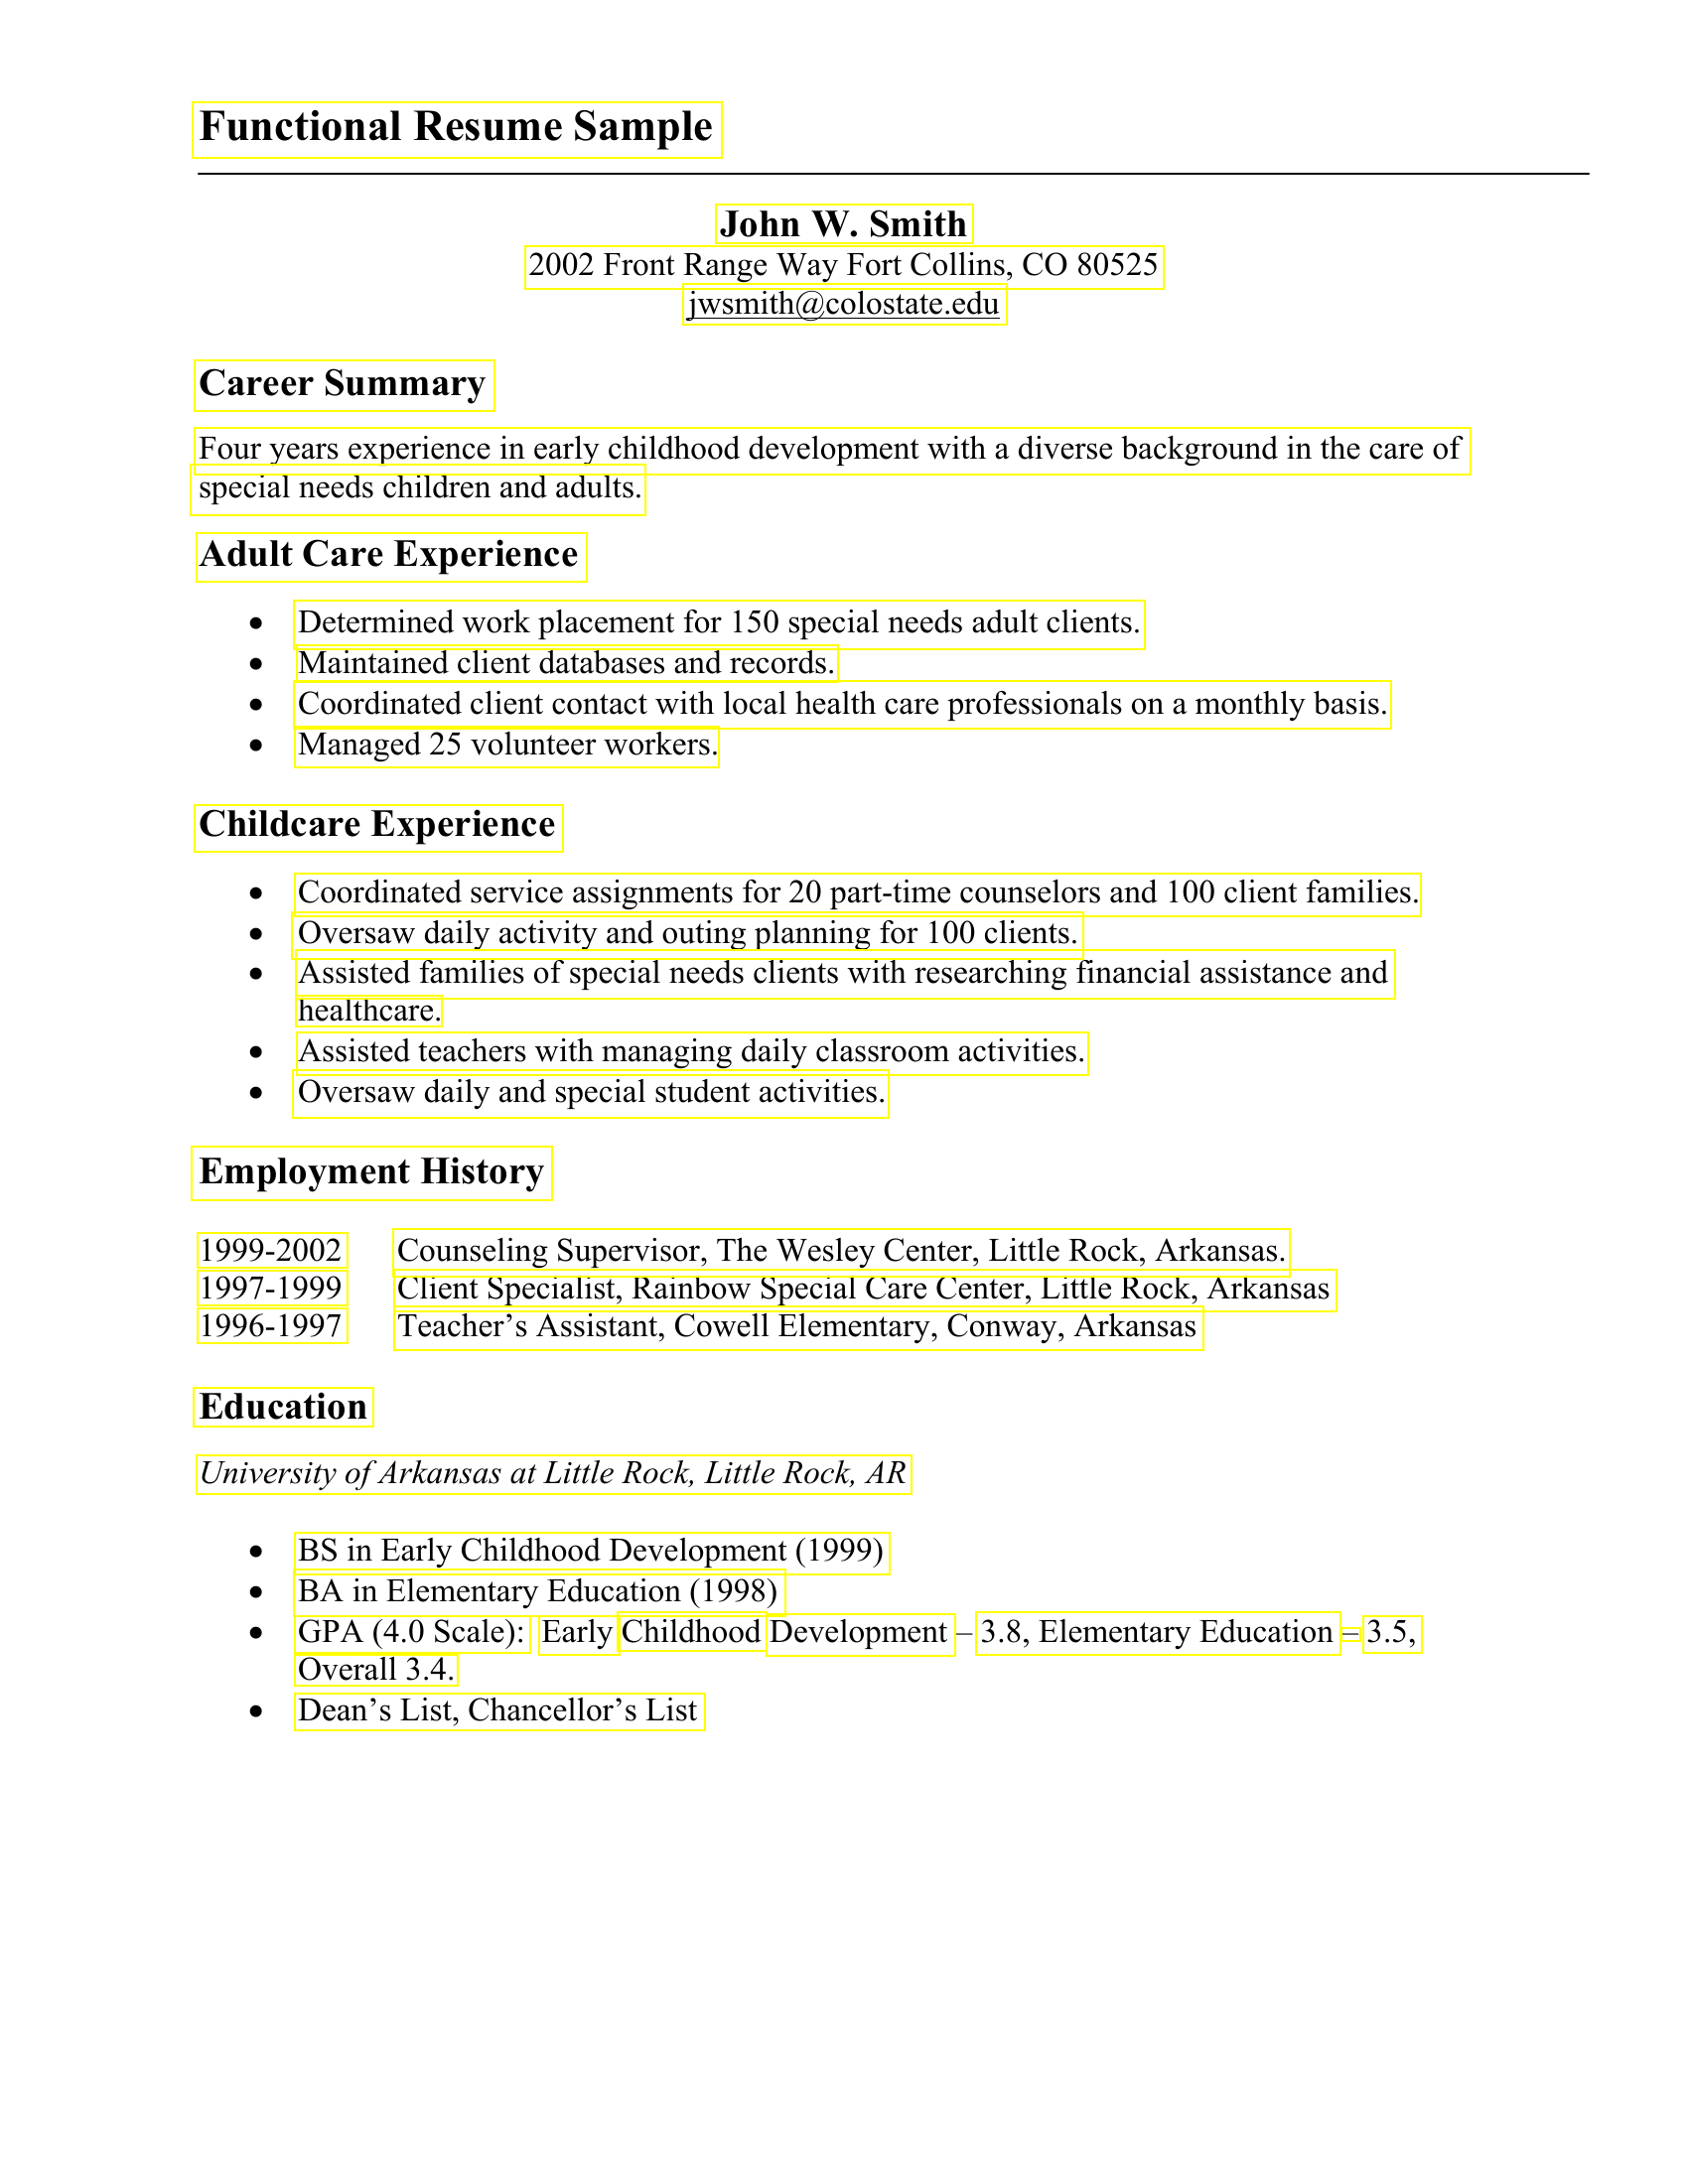

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [ ]:
bounds[1][1]

'John W. Smith'

In [ ]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Functional Resume Sample
John W. Smith
20O2 Front Range Way Fort Collins, C0 80525
iwsmith@colostate edu
Career Summary
Four years experience in early childhood development with a diverse background in the care of
special needs children and adults.
Adult Care Experience
Determined work placement for I5O special needs adult clients.
Maintained client databases and records.
Coordinated client contact with local health care professionals on a monthly basis.
Managed 25 volunteer workers.
Childcare Experience
Coordinated service assignments for 20 part-time counselors and IO0 client families.
Oversaw daily activity and outing planning for IO0 clients.
Assisted families ofspecial needs clients with researching financial assistance and
healthcare.
Assisted teachers with managing daily classroom activities.
Oversaw daily and special student activities.
Employment History
Counseling Supervisor, The Wesley Center, Little Rock, Arkansas.
1999-2002
Client Specialist, Rainbow Special Care Center, L

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

In [ ]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)